In [15]:
import numpy as np
from samplers.SEIR_emcee import SEIR_emcee
from samplers.SEIR_pytwalk import SEIR_pytwalk
from samplers.SEIR_pyhmc import SEIR_pyhmc
from epidemic_model import SEIR_Model
from utils.utils import load_data, parser
import sys
import matplotlib.pyplot as plt
from time import time

In [16]:
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

Data loaded from file:  data/Smoothed_Cases_Third_Wave.csv


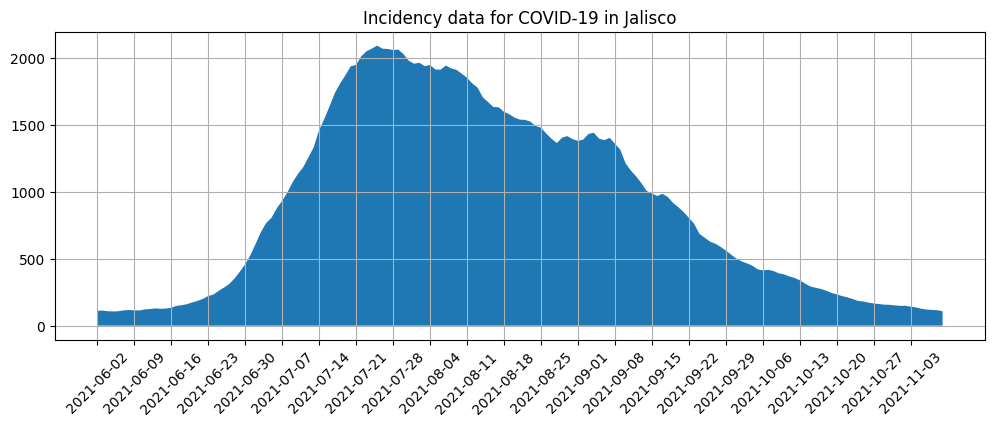

In [17]:
# Loading configuration from configuration file
fname_conf = './configuration_file_test.cfg'

params = parser(fname_conf)

times, data, dates = load_data(params['fname'])

print('Data loaded from file: ', params['fname'])

# plotting data
plt.figure(figsize=(12,4))
plt.fill_between(dates,data, label='Incidency data')
plt.xticks(dates[::7],rotation=45)
plt.title('Incidency data for COVID-19 in Jalisco')
plt.grid()
plt.show()


In [18]:
# Total population size is taken from the configuration file
N = params["N"]

# Setting initial conditions
E0 = 0 
I0 = data[0]
R0 = 0
S0 = N - E0 - I0 - R0

x0 = [S0,E0,I0,R0]

iterations = params['iterations']  # Number of iterations for the MCMC sampler
ndim = 3                           # Dimension of the problem is 3: beta, sigma, gamma


In [19]:
seir_twalk = SEIR_pytwalk(
        ndim=ndim,
        data=data,
        time=times,
        x0=x0,
        labels=['beta', 'sigma', 'gamma'],
        **params
        )
    
xp0 = np.array([0.36,0.98,0.2])
xp1 = np.array([0.5,1.00,0.15])


In [20]:
ini_time = time()
seir_twalk.run(iterations,xp0,xp1)
end_time = time()
print('Time elapsed: ', end_time-ini_time)

pytwalk: Running the twalk to 4000 iterations .  Fri, 21 Mar 2025, 15:01:14.
       Finish in approx. 1 min and 47 sec.


/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:577: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)
/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:602: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) +  (self.nphi-2)*log(beta))
/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:563: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)
/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:652: RuntimeWarning: overflow encountered in exp
  A = exp((u - u_prop) + (W1 - W2))
/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:619: RuntimeWarning: overflow encountered in exp
  A = exp((u - u_prop) +  (self.nphi-2)*log(beta))


pytwalk:       2047 iterations so far. Finish in approx. 46 sec.


/home/abel/miniconda3/envs/bnn-env/lib/python3.11/site-packages/pytwalk/pytwalk.py:673: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) + (W1 - W2))


pytwalk: finished, 4000 iterations.
Fri, 21 Mar 2025, 15:02:49.
AutoMaxlag: maxlag= 1656.
Time elapsed:  95.03165769577026


In [ ]:
seir_twalk.summary()


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   0.227  0.012   0.212    0.243      0.007    0.002       4.0      27.0   
sigma  0.402  0.198   0.194    0.710      0.118    0.033       3.0      28.0   
gamma  0.153  0.020   0.132    0.177      0.013    0.001       3.0       7.0   

       r_hat  
beta    1.68  
sigma   1.84  
gamma   1.92  


(4000, 4)

AutoMaxlag: maxlag= 1656.
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   0.227  0.012   0.212    0.243      0.007    0.002       4.0      27.0   
sigma  0.402  0.198   0.194    0.710      0.118    0.033       3.0      28.0   
gamma  0.153  0.020   0.132    0.177      0.013    0.001       3.0       7.0   

       r_hat  
beta    1.68  
sigma   1.84  
gamma   1.92  


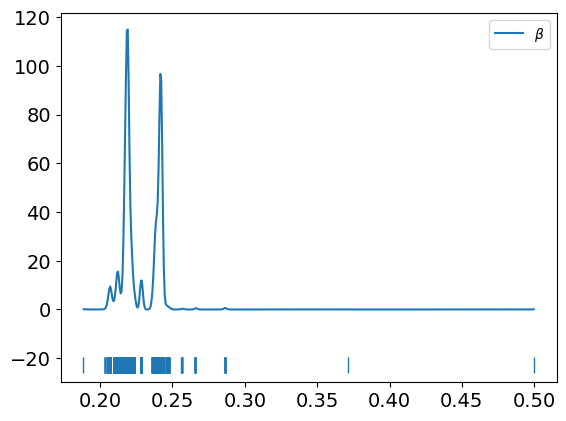

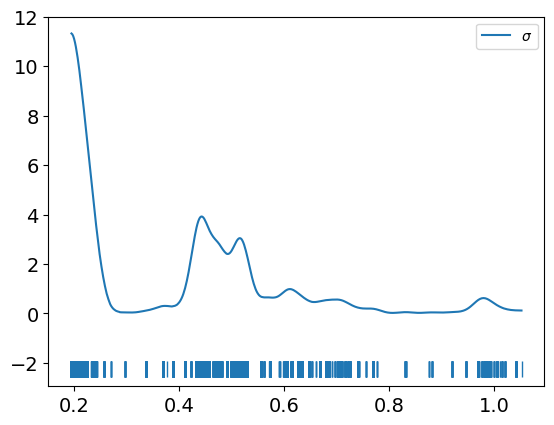

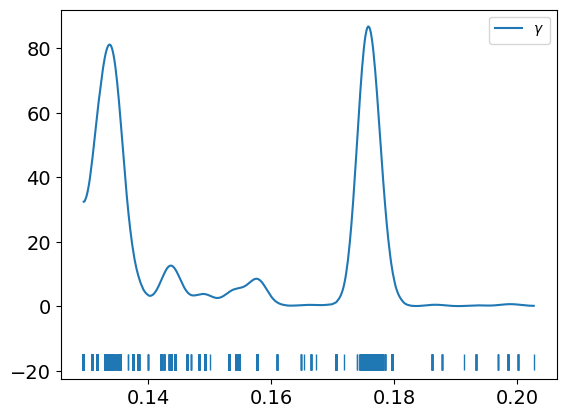

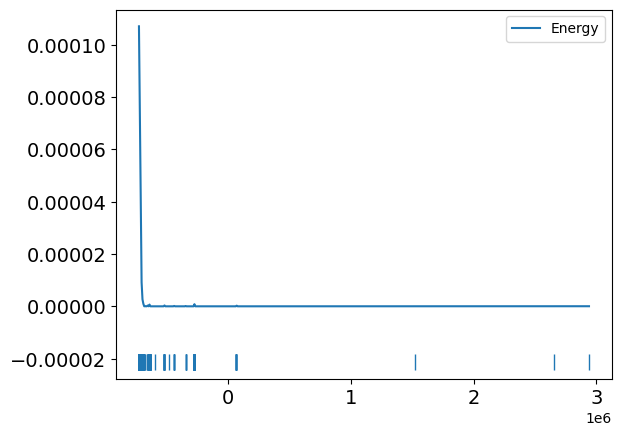

Generating 500 prior samples. Prior model: Gamma


100%|██████████| 798/798 [00:19<00:00, 40.71it/s]


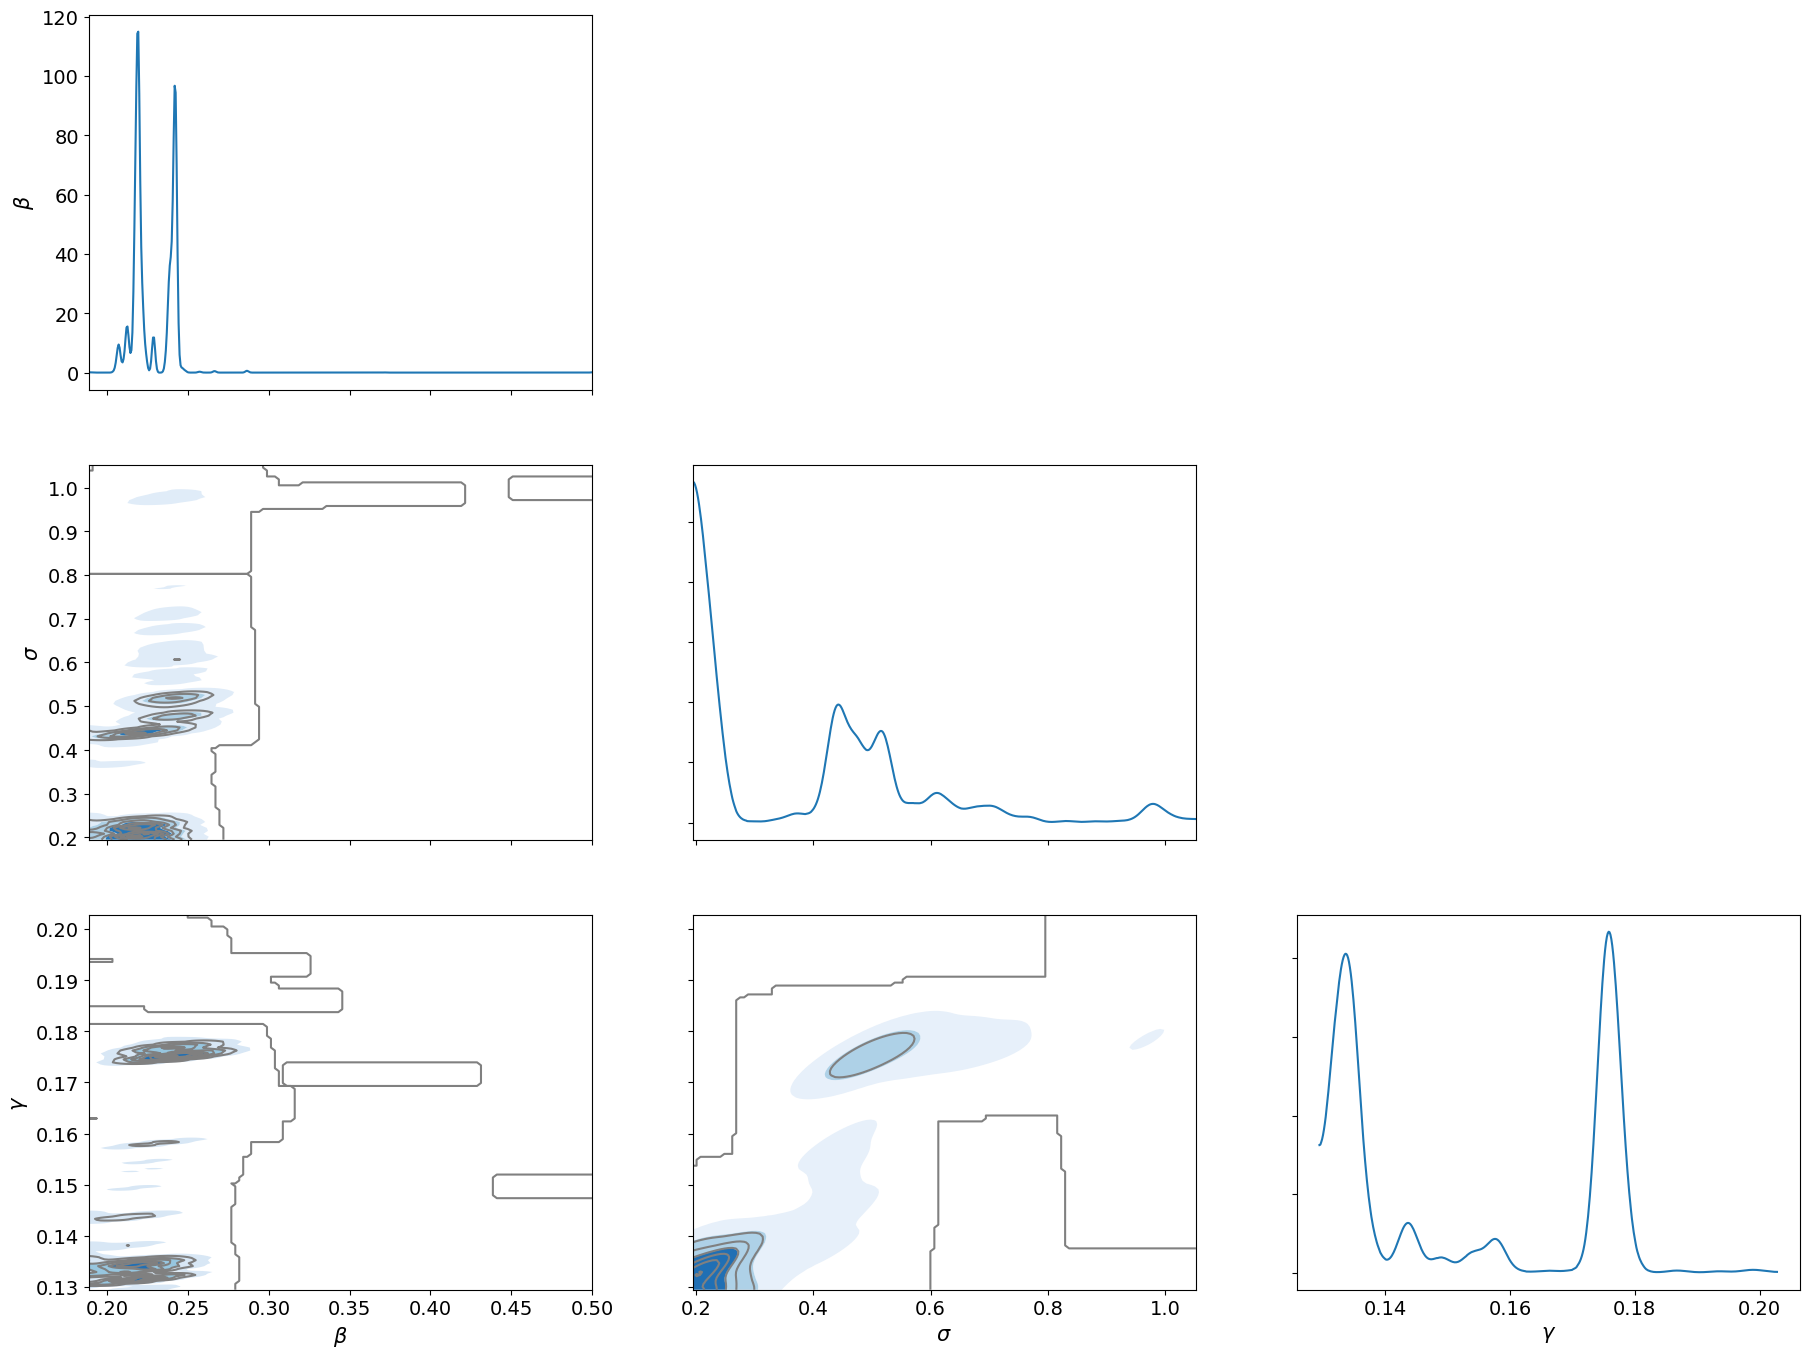

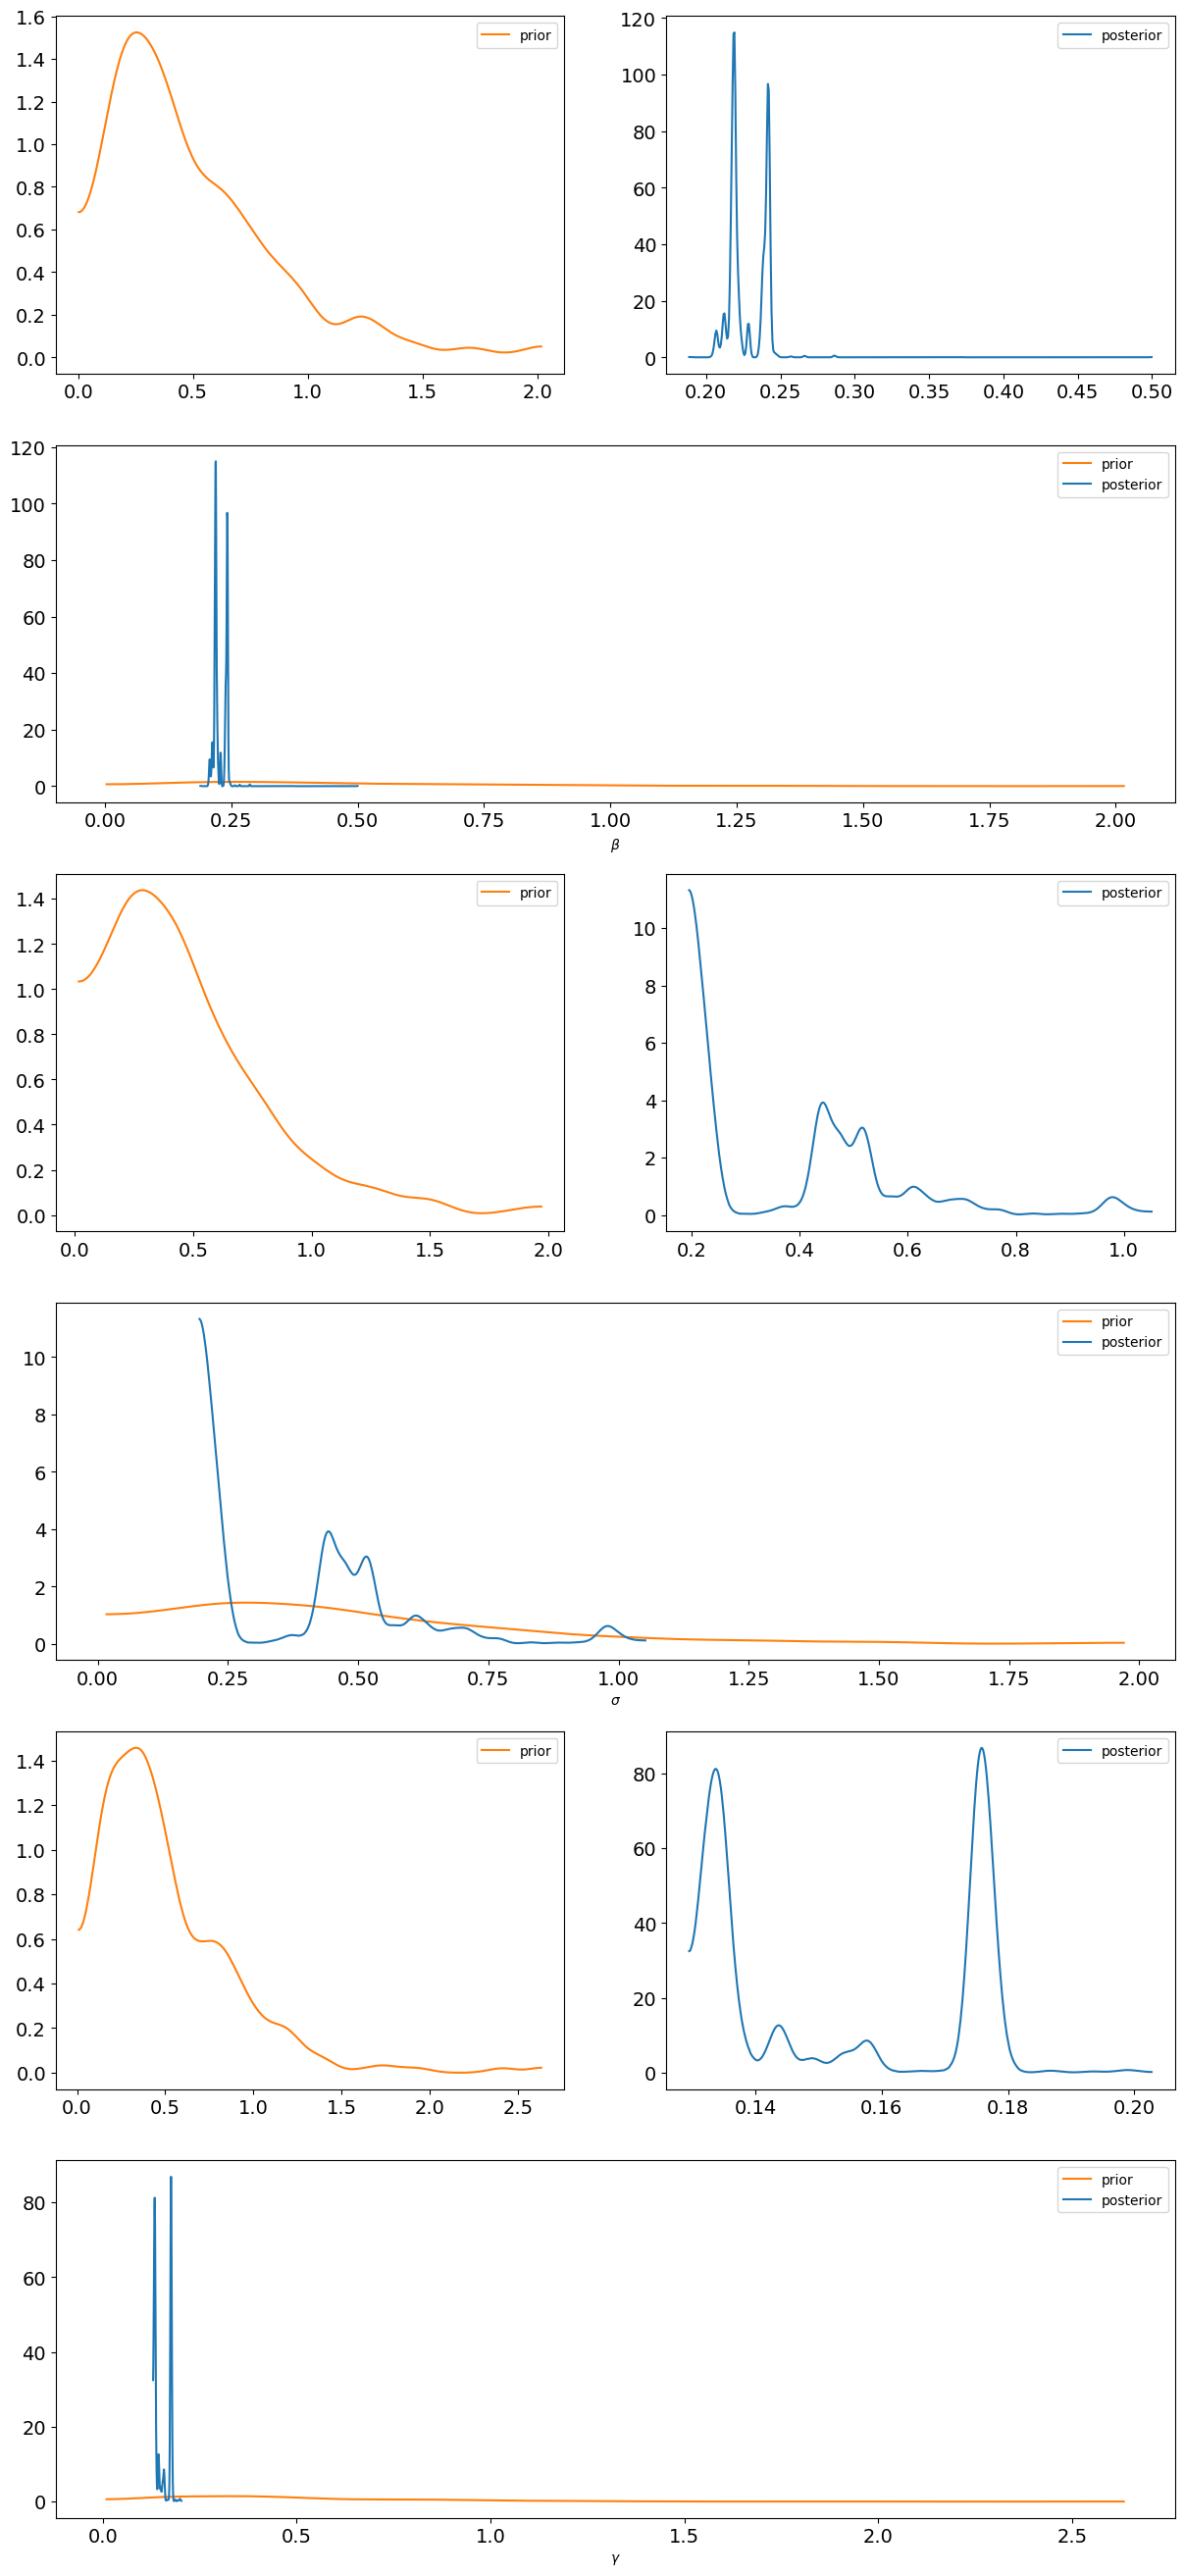

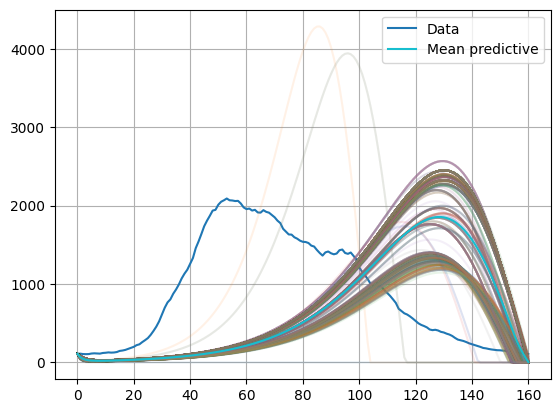

In [24]:
seir_twalk.create_dictionary()
seir_twalk.report_results()

AutoMaxlag: maxlag= 1656.
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   0.223  0.011   0.212    0.243      0.003    0.003      13.0      28.0   
sigma  0.317  0.121   0.194    0.499      0.074    0.014       4.0      32.0   
gamma  0.145  0.017   0.132    0.175      0.009    0.003       4.0       4.0   

       r_hat  
beta    1.64  
sigma   1.61  
gamma   1.69  


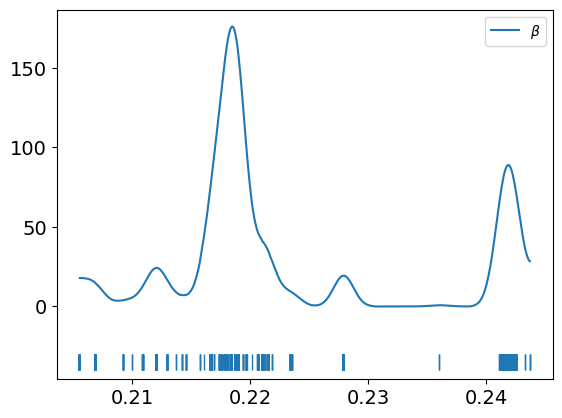

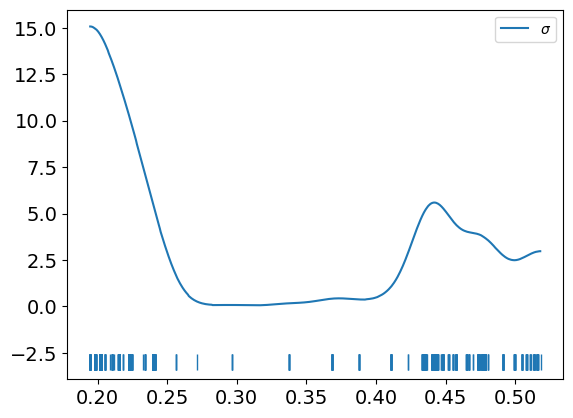

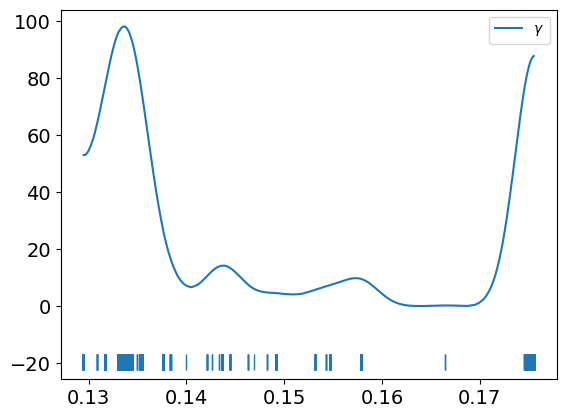

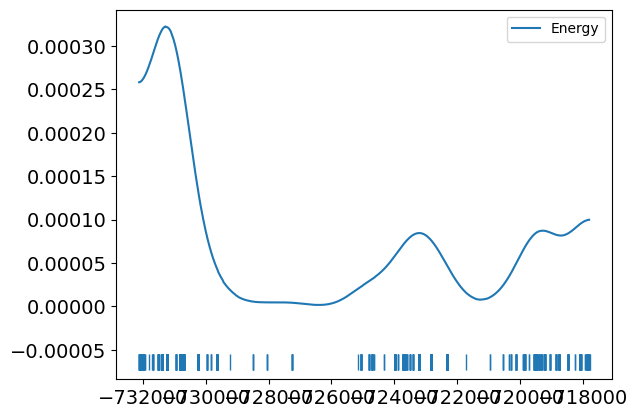

Generating 500 prior samples. Prior model: Gamma


100%|██████████| 120/120 [00:02<00:00, 41.75it/s]


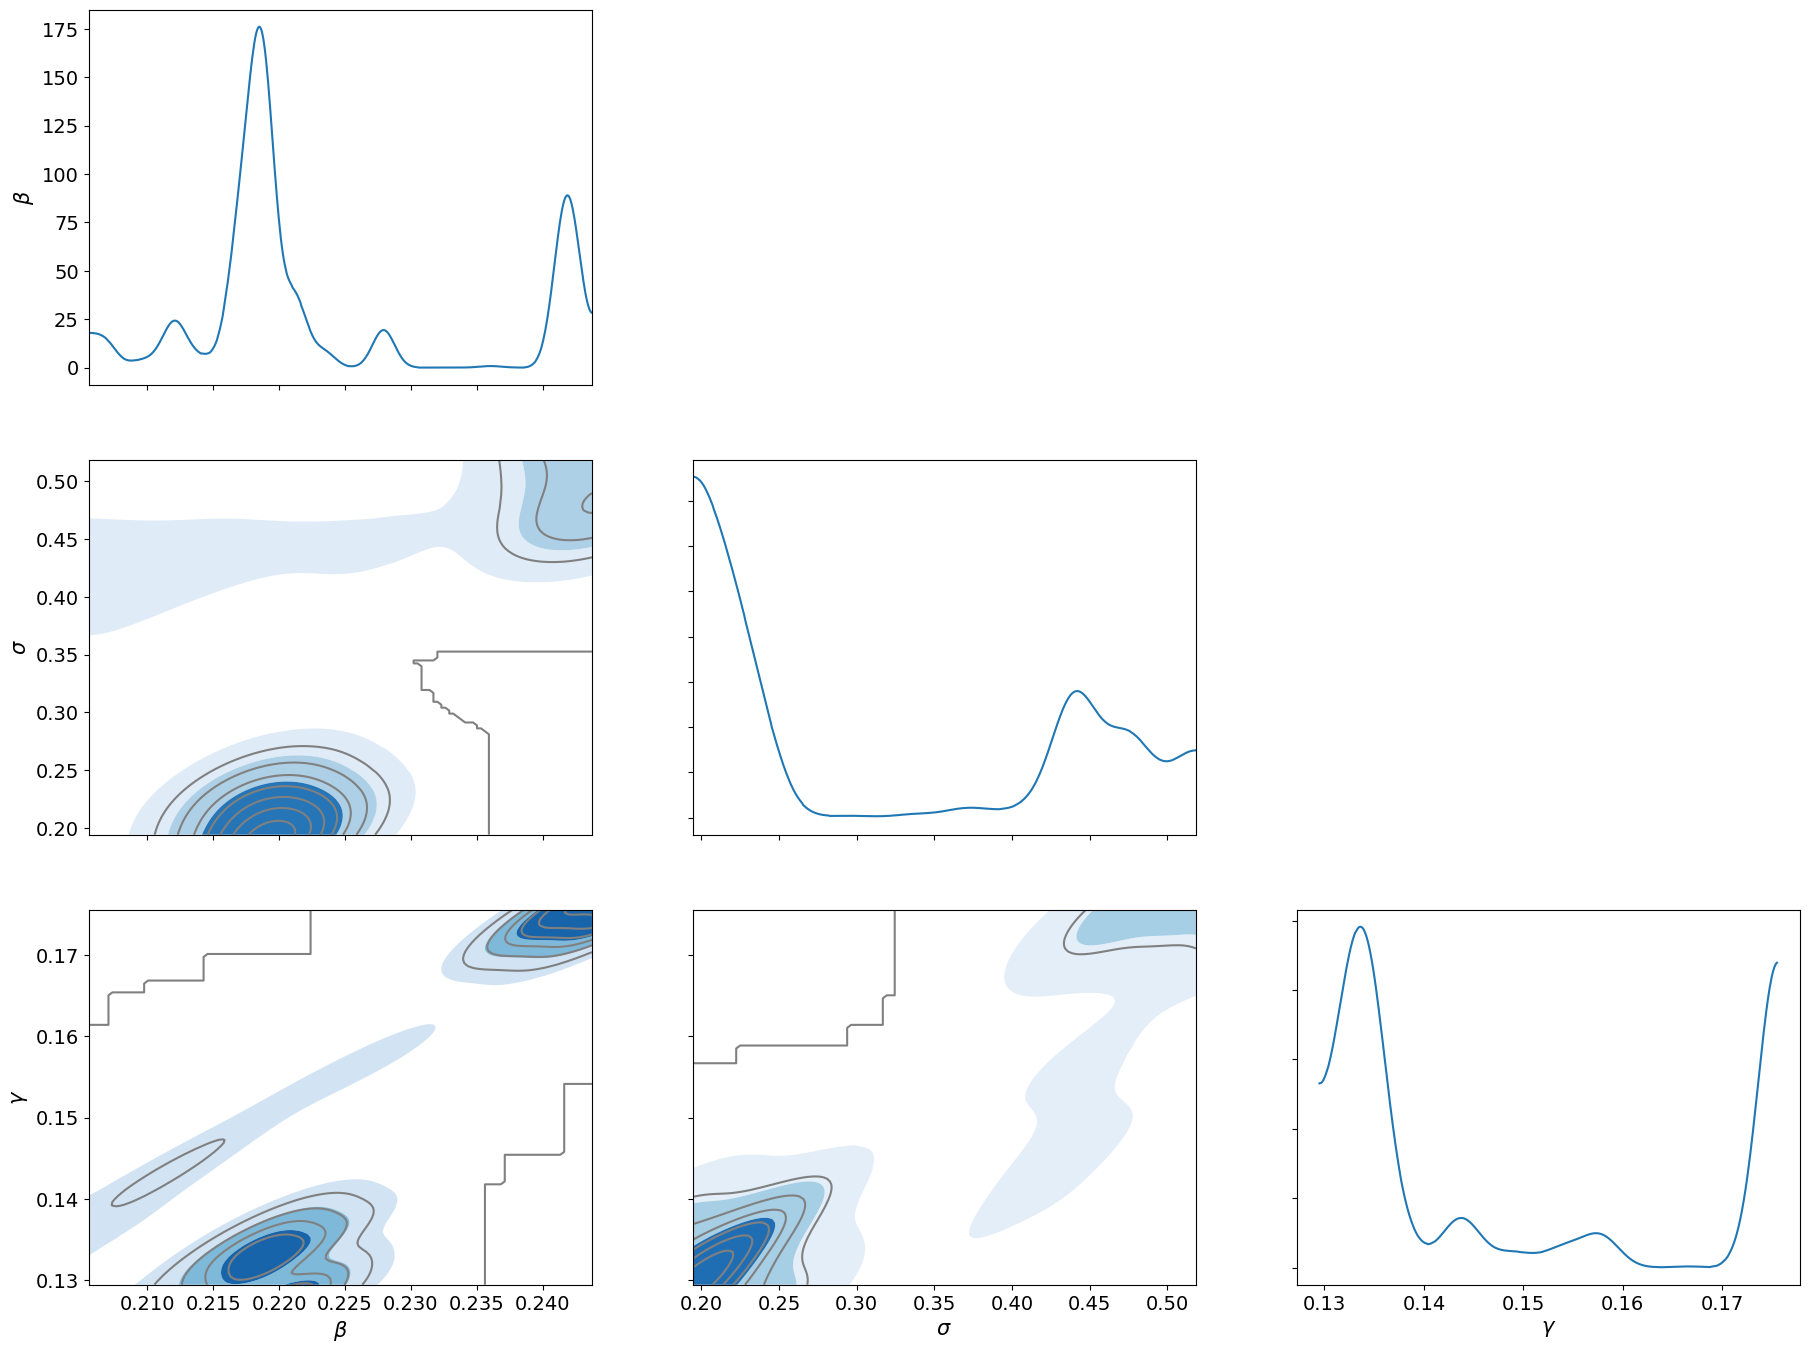

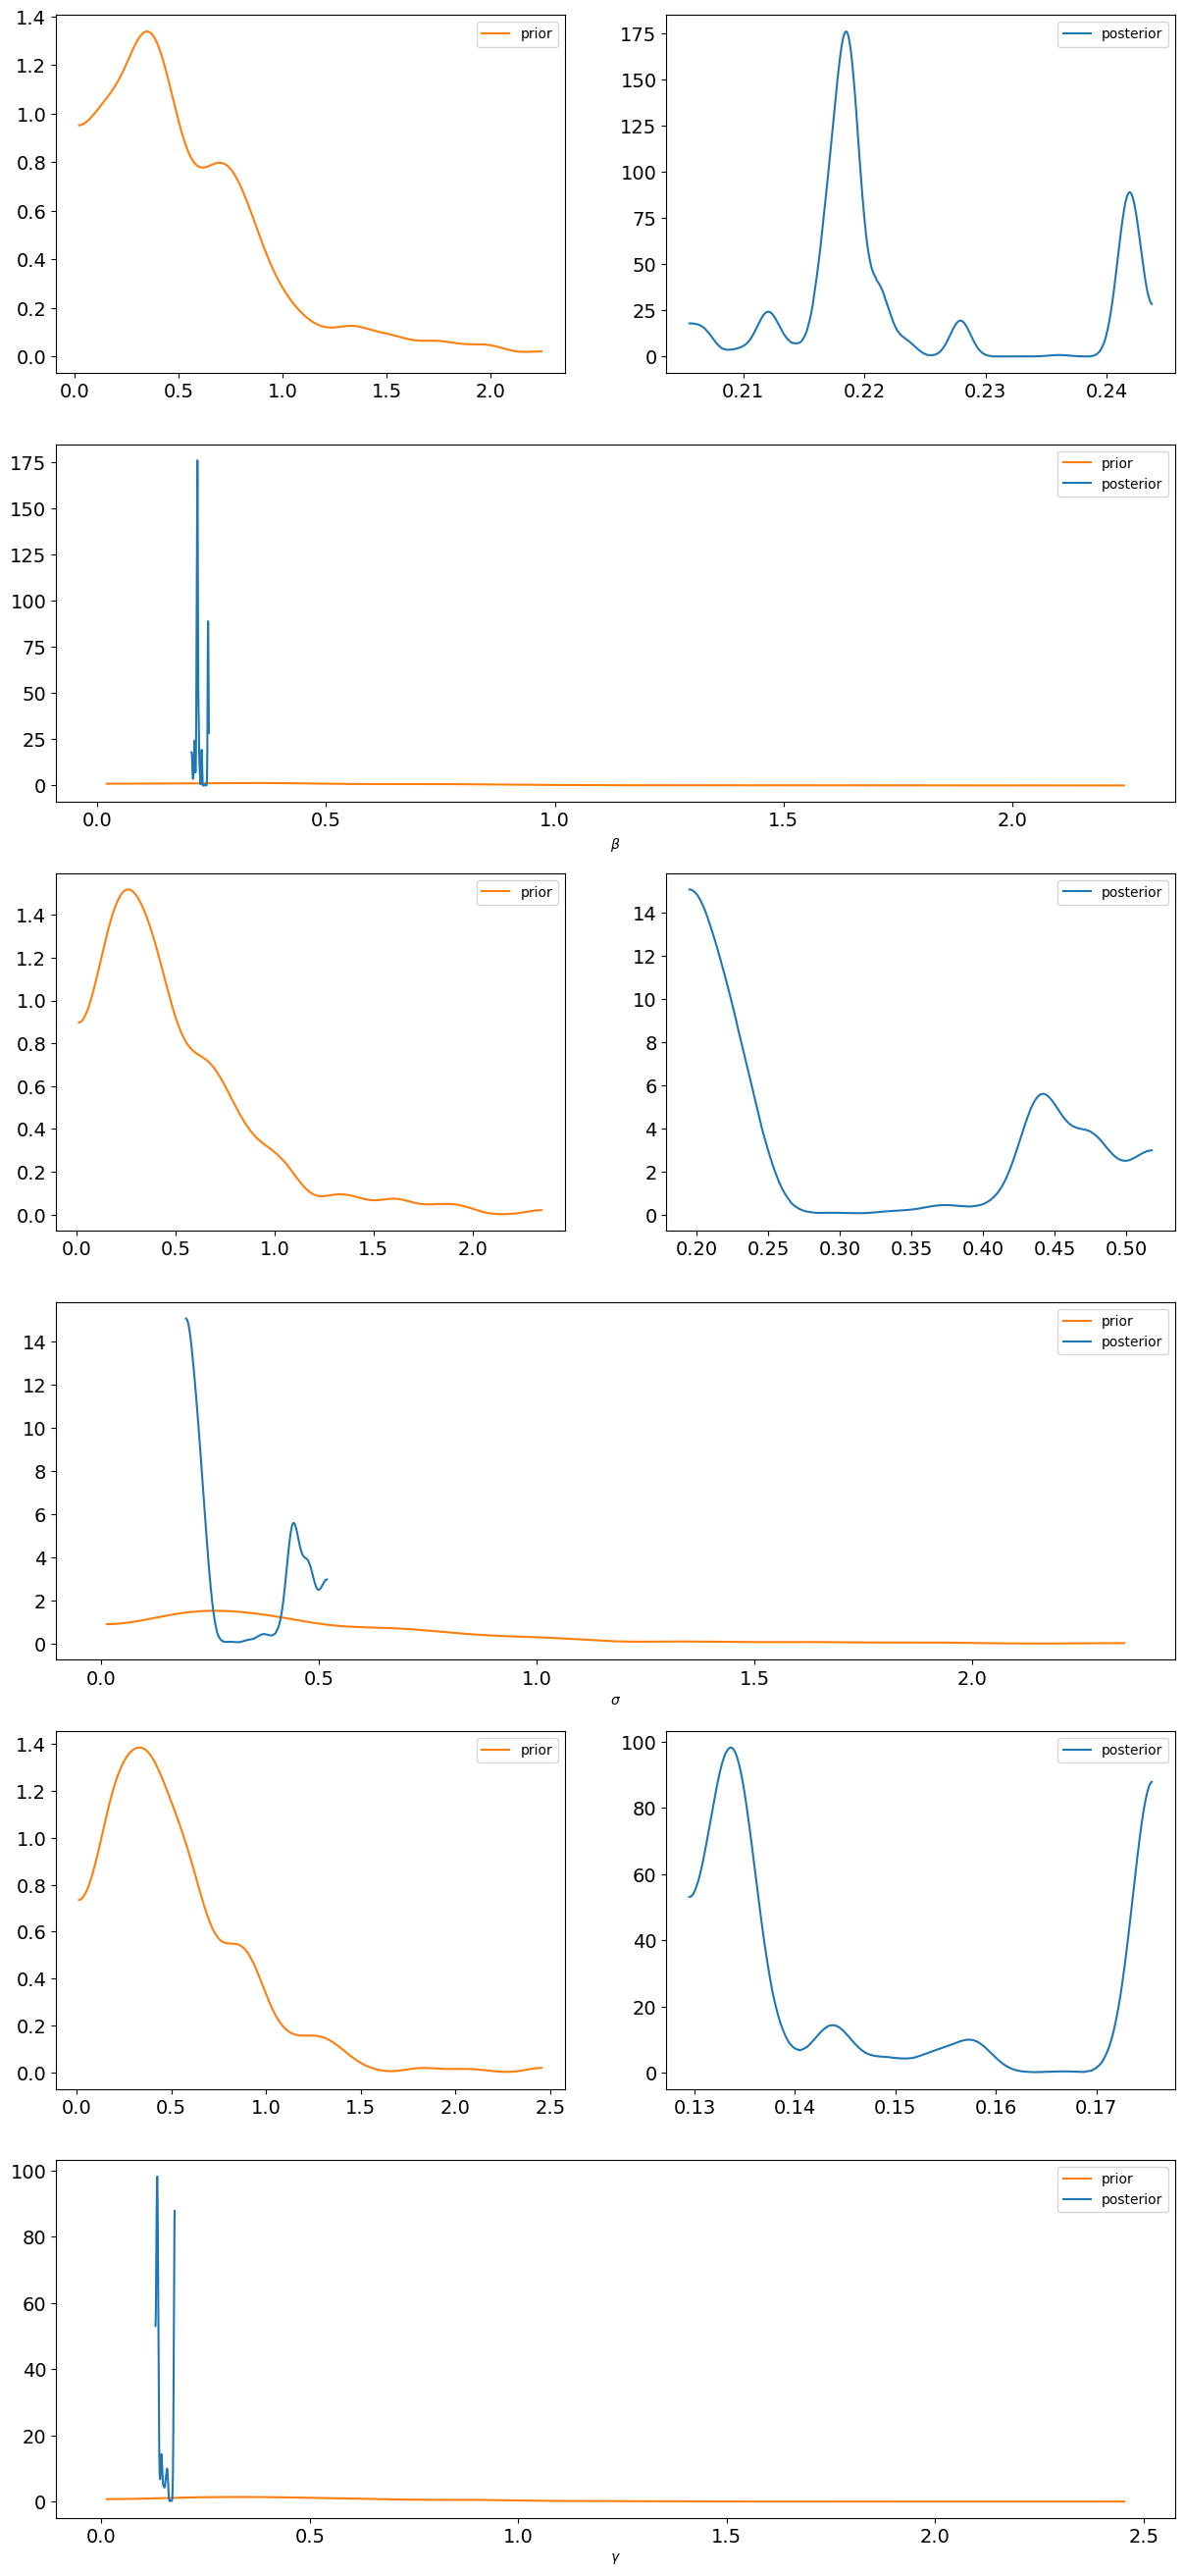

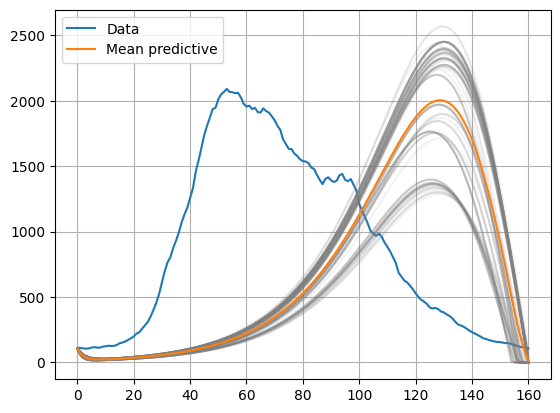

In [26]:
seir_twalk.create_dictionary(burnin=1000, subsample=5)

seir_twalk.report_results()

100%|██████████| 120/120 [00:03<00:00, 37.35it/s]


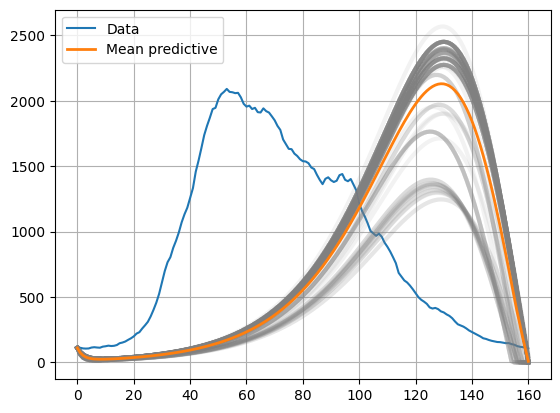

In [31]:
seir_twalk.plot_ppc()